# Transdermal Drug Delivery of Verapamil

Исследовалась модель распространения вещества при введении микроиглы под кожу.

Решался второй закон Фика с проникновением вещества в кровь:

$c = D \cdot \nabla^2 c + (K_{21}\cdot c_{b} \cdot {{V_b} \over {V_t}} - K_{12} c)$

$c_{b} = -K_e \cdot c_{b} + (K_{12}c\cdot {{V_t} \over {V_b}} - K_{21}c_{b})$

Все коэффициенты брались из статьи Transdermal drug delivery by microneedles: does skin metabolism matter?  Al-Qallaf et al.

Были промоделированы 2D и 3D случаи

# 2D случай

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.transforms import Affine2D
from mpl_toolkits.axisartist import floating_axes
from mpl_toolkits.mplot3d import Axes3D

from scipy.io import loadmat
import pandas as pd

In [2]:
Vb = {
    'And_2d_mm':2.63,
    'And_2d_nm':2.63,
    'Eich_2d_mm':27.39,
    'Eich_2d_nm':27.39,
    'Koike_2d_mm':6.47,
    'Koike_2d_nm':6.47
}

In [3]:
data2d = loadmat('all_2d.mat')
data3d = loadmat('A_m-m.mat')
constants = loadmat('add.mat')
C2d_time = data2d['And_2d_mm'][0][0][0]
Cb2d_time = data2d['And_2d_mm'][0][0][1]
C3d_time = data3d['And1'][0][0][0]
Cb3d_time = data3d['And1'][0][0][1]

In [4]:
data2d

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Sep 13 21:47:43 2018',
 '__version__': '1.0',
 '__globals__': [],
 'And_2d_mm': array([[(array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0

In [10]:
D = 7*10**(-8)
dx = constants['dx'][0][0]
dy = constants['dy'][0][0]
dz = constants['dz'][0][0]

In [6]:
constants

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Sep  9 10:57:19 2018',
 '__version__': '1.0',
 '__globals__': [],
 'dx': array([[0.00175]]),
 'dy': array([[0.0005]]),
 'dz': array([[0.0005]]),
 'needle_x': array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]], dtype=uint8),
 'needle_y': array([[21, 22, 23, 24, 25, 26, 27, 28, 29]], dtype=uint8)}

Посчитаем концентрацию в крови

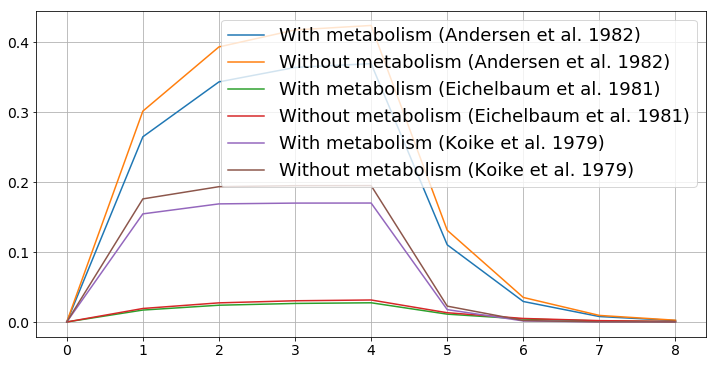

In [16]:
plt.figure(figsize=(12,6))
labels = {
    'And_2d_mm' : 'With metabolism (Andersen et al. 1982)',
    'And_2d_nm' : 'Without metabolism (Andersen et al. 1982)',
    'Eich_2d_mm' : 'With metabolism (Eichelbaum et al. 1981)',
    'Eich_2d_nm' : 'Without metabolism (Eichelbaum et al. 1981)',
    'Koike_2d_mm' : 'With metabolism (Koike et al. 1979)',
    'Koike_2d_nm' : 'Without metabolism (Koike et al. 1979)'
}
for key in Vb.keys():
    Cb_time = data2d[key][0][0][1]
    cb_dyn = []
    for cb in Cb_time:
        cb_dyn.append(np.sum(cb)*dx*dy*dz*9/Vb[key]/1e-5)
    plt.plot(cb_dyn, label=labels[key])

plt.grid()
# plt.ylabel(r'Cb, ng/L', size=16);
# plt.xlabel(r't, hour', size=16);
plt.legend(fontsize=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

И количество поступившего вещества

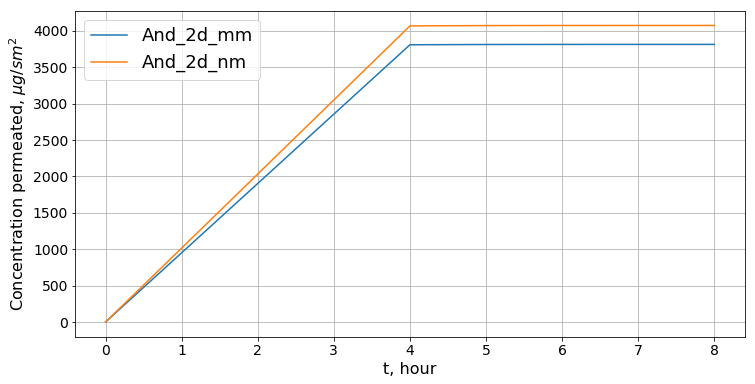

In [10]:
plt.figure(figsize=(12,6))
for key in ['And_2d_mm','And_2d_nm']:
    C_time = data2d[key][0][0][0]
    fluxes = []
    c_permeated = [0]
    c = C_time[0]
    for c in C_time[1:]:
        flux = -D*np.sum((c[14]-c[12])[20:29]*dy/dx*1000)/dy/9
        c_permeated.append(flux*3600+c_permeated[-1])
    plt.plot(c_permeated, label=key)
plt.grid()
# plt.ylabel(r'Concentration permeated, $\mu g/sm^2$', size=16);
# plt.xlabel(r't, hour', size=16);
# plt.legend(fontsize=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

Сравним с бенчмарк

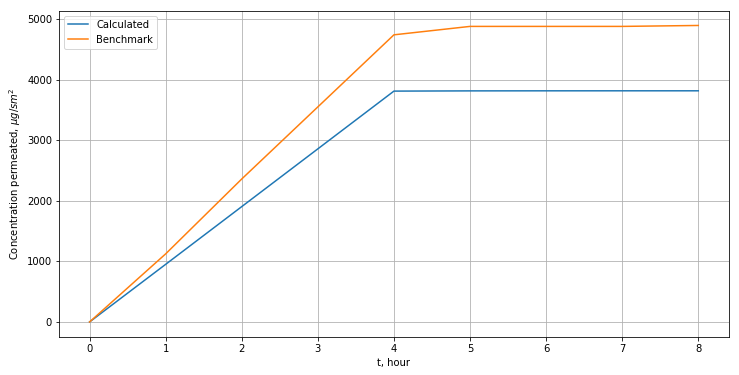

In [12]:
benchPerm = pd.read_csv('./andersen_met_perm.csv')
plt.figure(figsize=(12,6))
for key in ['And_2d_mm']:
    C_time = data2d[key][0][0][0]
    fluxes = []
    c_permeated = [0]
    c = C_time[0]
    for c in C_time[1:]:
        flux = -D*np.sum((c[14]-c[12])[20:29]/dx*1000)/9
        c_permeated.append(flux*3600+c_permeated[-1])
    plt.plot(c_permeated, label='Calculated')
plt.plot(benchPerm.time, benchPerm['concentration'], label='Benchmark')
plt.legend()
plt.grid()
plt.ylabel(r'Concentration permeated, $\mu g/sm^2$');
plt.xlabel(r't, hour');
plt.show()

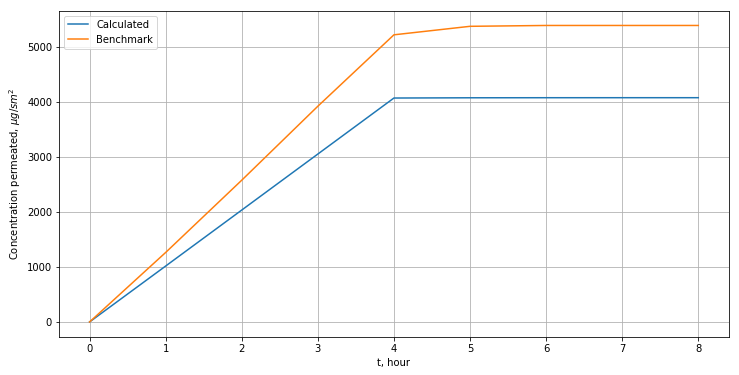

In [13]:
benchPerm = pd.read_csv('./andersen_nomet_perm.csv')
plt.figure(figsize=(12,6))
for key in ['And_2d_nm']:
    C_time = data2d[key][0][0][0]
    fluxes = []
    c_permeated = [0]
    c = C_time[0]
    for c in C_time[1:]:
        flux = -D*np.sum((c[14]-c[12])[20:29]*dy/dx*1000)/dy/9
        c_permeated.append(flux*3600+c_permeated[-1])
    plt.plot(c_permeated, label='Calculated')
plt.plot(benchPerm.time, benchPerm['concentration'], label='Benchmark')
plt.legend()
plt.grid()
plt.ylabel(r'Concentration permeated, $\mu g/sm^2$');
plt.xlabel(r't, hour');
plt.show()

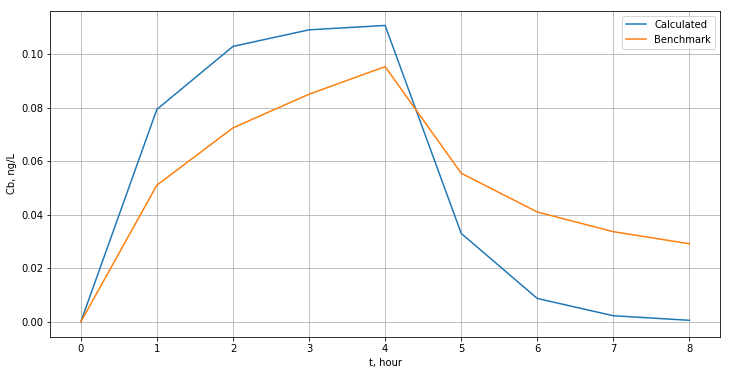

In [15]:
benchPerm = pd.read_csv('./andersen_met_blodd.csv')
plt.figure(figsize=(12,6))
for key in ['And_2d_mm']:
    Cb_time = data2d[key][0][0][1]
    cb_dyn = []
    for cb in Cb_time:
        cb_dyn.append(np.sum(cb)*dx*dy*dz*9/2*3/Vb[key]/1e-5/5)
    plt.plot(cb_dyn, label='Calculated')
plt.plot(benchPerm.time, benchPerm['concentration'], label='Benchmark')
plt.legend()
plt.grid()
plt.ylabel(r'Cb, ng/L');
plt.xlabel(r't, hour');
plt.show()

Картина течения в момент t=3ч

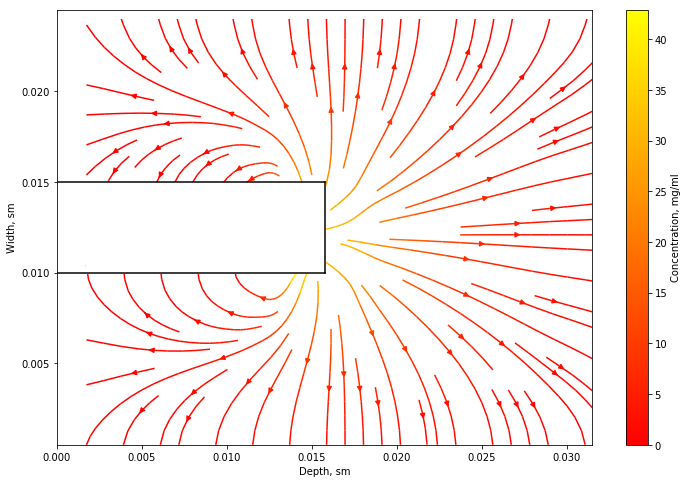

In [12]:
x = np.arange(0, 0.035,dx)
y = np.arange(0, 0.025, dy)

c_temp = data2d['And_2d_mm'][0][0][0][3]

gradX = []
for i in range(1,19):
    gradX.append(-D*(c_temp[i+1]-c_temp[i-1])/dx)
gradX = np.array(gradX)[:,1:-1]

gradY = []
for i in range(1,49):
    gradY.append(-D*(c_temp[:,i+1]-c_temp[:,i-1])/dy)
gradY = np.array(gradY).T[1:-1,:]

# gradX[0:9,:]=0
# gradY[0:9,:]=0

l = 9*0.00175
fig0, ax0 = plt.subplots()
fig0.set_size_inches(12,8)
strm = ax0.streamplot(x[1:-1], y[1:-1], gradX.T, gradY.T, color=c_temp.T[1:-1,1:-1],
                     cmap=plt.cm.autumn)
cbar = fig0.colorbar(strm.lines)
cbar.set_label('Concentration, mg/ml')
plt.fill_between([0.00175, l], [0.01,0.01], [0.015,0.015], color='white', zorder=100)
plt.plot([0.0001, l], [0.01,0.01], '-k', zorder=101)
plt.plot([0.0001, l], [0.015,0.015], '-k', zorder=101)
plt.plot([l, l], [0.01,0.015],'-k', zorder=101)
# plt.plot(np.array(tmp).T[0], np.array(tmp).T[1], 'o')
plt.xlim(0.)
plt.ylim(dy, 0.025-dy)
plt.xlabel('Depth, sm')
plt.ylabel('Width, sm')
plt.show()

Линии построены против направления градиента концентрации

На основании градиентов построим распространение вещества

In [13]:
def calc_dxdy(point: list) -> tuple:
#     try:
        i_point = int(point[0]//dx)
        i_point = min(i_point, 17)
        j_point = int(point[1]//dy)
        j_point = min(j_point, 47)
        _dx = gradX[i_point, j_point]
        _dy = gradY[i_point, j_point]
        return [point[0]+_dx, point[1]+_dy]
#     except:
#         return [0, 0.012]

In [14]:
def calc_conc(point):
    i_point = int(point[0]//dx)
    i_point = min(i_point, 17)
    j_point = int(point[1]//dy)
    j_point = min(j_point, 47)
    return c_temp[i_point, j_point]/43.

In [15]:
def plot_gif(data=calc_dxdy, folder='./diffusion_gif/'):
    points = [[9*dx,(19+i)*dy] for i in range(10)]
    for t in range(100):
        im = plt.imread('skinmodel.png')
        plt.figure(figsize=(5,6))

        points = list(map(data, points))
        points += [[9*dx,(19+i)*dy] for i in range(10)]
        ps = np.array(points)
        for point in ps:
            alp = calc_conc(point)
            plt.plot(point[1], point[0], '.', color='red', alpha=alp, zorder=10)

        l = 9*0.00175
    #     cbar.set_label('Concentration, mg/ml')
        plt.fill_betweenx([0, l], [19*dy,19*dy], [28*dy,28*dy], color='black', zorder=100)
        plt.plot([19*dy,19*dy], [0.0001, l], '-k', zorder=101)
        plt.plot([28*dy,28*dy], [0.0001, l], '-k', zorder=101)
        plt.plot([19*dy,28*dy], [l, l], '-k', zorder=101)
        # plt.plot(np.array(tmp).T[0], np.array(tmp).T[1], 'o')
        plt.ylim(0.033, 0)
        plt.xlim(0,0.025-dy)
        plt.ylabel('Depth, sm')
        plt.xlabel('Width, sm')
        plt.title('After {} sec'.format(t))
        plt.imshow(im, aspect='equal', extent=(-0.002, 0.025, 0.033, -0.008))
        plt.savefig(folder+'{:02d}.png'.format(t), dpi=50);
#         plt.show()
        plt.close()

In [16]:
plot_gif()

In [17]:
!convert -delay 20 -loop 0 ./diffusion_gif/*.png full_model_verapamil.gif

In [18]:
from IPython.display import Image
Image(url='./full_model_verapamil.gif')

# 3D случай

Для сравнения 2D и 3D использовались коэффициенты для Andersen

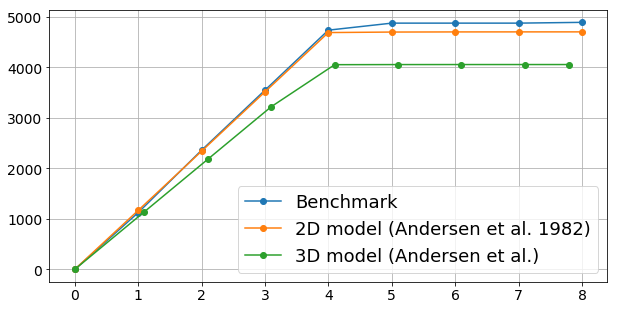

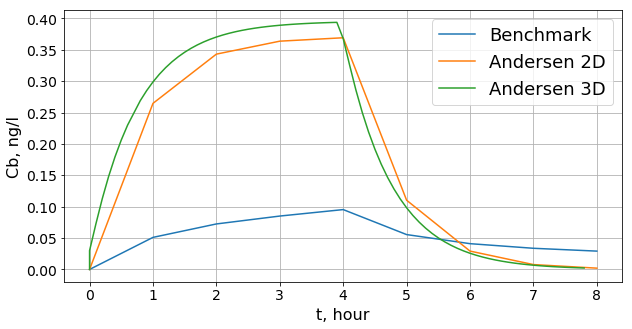

In [18]:
i_eff=5
times1  = []
fluxes1 = []
for t_idx, c in enumerate(C2d_time):
        fluxes1.append(-D*np.sum((c[11+i_eff]-c[9+i_eff])[20:29]*dy/dx*1000)/dy/4)
        times1.append(t_idx)

c_permeated1 = [0]
for i in range(1, len(times1)):
    c_permeated1.append(
        fluxes1[i]*(times1[i]-times1[i-1])*3600 + c_permeated1[-1]
    )

i_eff=1
times2  = []
fluxes2 = []
for t_idx, c in enumerate(C3d_time):
    if t_idx != 7:
        fluxes2.append(-D*np.sum((c[11+i_eff]-c[9+i_eff])[20:29,20:29]*dy/dx*1000)/dy/81)
        times2.append(t_idx*0.1)

c_permeated2 = [0]
for i in range(1, len(times2)):
    c_permeated2.append(
        fluxes2[i]*(times2[i]-times2[i-1])*3600 + c_permeated2[-1]
    )

benchPerm = pd.read_csv('./andersen_met_perm.csv')

plt.figure(figsize=(10,5))
plt.plot(benchPerm.time, benchPerm['concentration'], 'o-', label='Benchmark')
plt.plot(times1,c_permeated1, 'o-', label='2D model (Andersen et al. 1982)')
plt.plot(times2[::10]+[times2[-1]],c_permeated2[::10]+[c_permeated2[-1]], 'o-', label='3D model (Andersen et al.)')
# plt.ylabel(r'Concentration permeated, $\mu g/sm^2$', size=16);
# plt.xlabel(r't, hour', size=16);
plt.legend(fontsize=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid()
plt.show()

cb_din1 = [0]
ts1 = [0]
for t_idx, cb in enumerate(Cb2d_time):
        cb_din1.append(
            np.sum(cb)*dx*dy*dz*9/1e-5/Vb['And_2d_mm']
        )
        ts1.append(t_idx)

cb_din2 = [0]
ts2 = [0]
for t_idx, cb in enumerate(Cb3d_time):
    if t_idx != 7:
        cb_din2.append(
            np.sum(cb)*dx*dy*dz/1e-5/Vb['And_2d_mm']
        )
        ts2.append(t_idx*0.1)

benchPerm = pd.read_csv('./andersen_met_blodd.csv')
plt.figure(figsize=(10,5))
plt.plot(benchPerm.time, benchPerm['concentration'], label='Benchmark')
plt.plot(ts1, cb_din1, label='Andersen 2D')
plt.plot(ts2, cb_din2, label='Andersen 3D')
plt.ylabel(r'Cb, ng/l', size=16);
plt.xlabel(r't, hour', size=16);
plt.legend(fontsize=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid()
plt.show()

# Сравнение диффузии верпамила и пептида (однокомпонентное уравнение)

In [19]:
data = loadmat('./peptide&verapamil_2d_onlydiff.mat')

In [20]:
pep = data['And_2d_pep_diff'][0][0][0]
ver = data['And_2d_ver_diff'][0][0][0]

In [21]:
pep = pep[19]
ver = ver[19]

In [22]:
def calc_conc(point):
    i_point = int(point[0]//dx)
    i_point = min(i_point, 17)
    j_point = int(point[1]//dy)
    j_point = min(j_point, 47)
    return pep[i_point, j_point]/43.

In [23]:
x = np.arange(0, 0.035,dx)
y = np.arange(0, 0.025, dy)

gradX = []
for i in range(1,19):
    gradX.append(-D*(pep[i+1]-pep[i-1])/dx)
gradX = np.array(gradX)[:,1:-1]

gradY = []
for i in range(1,49):
    gradY.append(-D*(pep[:,i+1]-pep[:,i-1])/dy)
gradY = np.array(gradY).T[1:-1,:]

def calc_dxdy_pep(point: list) -> tuple:
#     try:
        i_point = int(point[0]//dx)
        i_point = min(i_point, 17)
        j_point = int(point[1]//dy)
        j_point = min(j_point, 47)
        _dx = gradX[i_point, j_point]
        _dy = gradY[i_point, j_point]
        return [point[0]+_dx, point[1]+_dy]
#     except:
#         return [0, 0.012]

In [24]:
plot_gif(data=calc_dxdy_pep)

In [25]:
!convert -delay 20 -loop 0 ./diffusion_gif/*.png peptide.gif

In [26]:
def calc_conc(point):
    i_point = int(point[0]//dx)
    i_point = min(i_point, 17)
    j_point = int(point[1]//dy)
    j_point = min(j_point, 47)
    return ver[i_point, j_point]/43.

In [27]:
x = np.arange(0, 0.035,dx)
y = np.arange(0, 0.025, dy)

gradX = []
for i in range(1,19):
    gradX.append(-D*(ver[i+1]-ver[i-1])/dx)
gradX = np.array(gradX)[:,1:-1]

gradY = []
for i in range(1,49):
    gradY.append(-D*(ver[:,i+1]-ver[:,i-1])/dy)
gradY = np.array(gradY).T[1:-1,:]

def calc_dxdy_ver(point: list) -> tuple:
#     try:
        i_point = int(point[0]//dx)
        i_point = min(i_point, 17)
        j_point = int(point[1]//dy)
        j_point = min(j_point, 47)
        _dx = gradX[i_point, j_point]
        _dy = gradY[i_point, j_point]
        return [point[0]+_dx, point[1]+_dy]
#     except:
#         return [0, 0.012]

In [28]:
plot_gif(data=calc_dxdy_ver)

In [29]:
!convert -delay 20 -loop 0 ./diffusion_gif/*.png verapamil.gif

# 100 начальных секунд - концентрация

In [102]:
data = loadmat('./100s_ver_pep.mat')

In [103]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'And_2d_pep_100sec_drop', 'And_2d_ver_100sec'])

In [104]:
conc = data['And_2d_ver_100sec'][0][0][0]

In [105]:
conc.shape

(101, 20, 50)

In [106]:
dx = constants['dx'][0][0]
dy = constants['dy'][0][0]

Верапамил

In [107]:
l = 8*0.00175
maxval = np.max(conc[1])
X = np.array([i*dx for i in range(20)])
Y = np.array([i*dy for i in range(50)])
X, Y = np.meshgrid(X,Y)
for t in range(100):
    folder = './diffusion_gif/'
    im = plt.imread('skinmodel.png')
    # plt.figure(figsize=(6,6))
    fig, ax = plt.subplots()
    fig.set_size_inches(5,6)
    fig.get_axes()
    cs = ax.contourf(Y, X, conc[t].T, colors='red', vmax=maxval, vmin=1e-3, levels=np.linspace(1e-3, maxval, 100))
    if t != 1:
        for i, c in enumerate(cs.collections):
            c.set_alpha(i/len(cs.collections))
    else:
        for i, c in enumerate(cs.collections):
            c.set_alpha(0)
    #     cbar.set_label('Concentration, mg/ml')
    plt.fill_betweenx([0, l], [19*dy,19*dy], [29*dy,29*dy], color='#23a2f7', zorder=100)
    plt.plot([19*dy,19*dy], [0.0001, l], '-', color='#23a2f7', zorder=101)
    plt.plot([29*dy,29*dy], [0.0001, l], '-', color='#23a2f7', zorder=101)
    plt.plot([19*dy,19*dy], [l, l], '-', color='#23a2f7', zorder=101)
#     plt.plot(np.array(tmp).T[0], np.array(tmp).T[1], 'o')
    plt.ylim(49*dy, 0)
    plt.xlim(0,13*dx)
#     plt.ylabel('Depth, сm')
#     plt.xlabel('Width, сm')
    for ax in fig.axes:
        ax.get_xaxis().set_visible(False)
    for ax in fig.axes:
        ax.get_yaxis().set_visible(False)
#     plt.title('After {} sec'.format(t))
    plt.imshow(im, aspect='equal', extent=(-0.002, 0.025-dx, 0.025, -0.01))
    plt.savefig(folder+'{:02d}.png'.format(t), dpi=50);
#     plt.show()
    plt.close()

In [108]:
!convert -delay 10 -loop 0 ./diffusion_gif/*.png verapamil.gif

In [5]:
data = loadmat('./pep_100s.mat')

In [6]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'And_2d_pep_100sec'])

In [7]:
conc = data['And_2d_pep_100sec'][0][0][0]

In [8]:
conc.shape

(101, 20, 50)

Пептид

In [12]:
l = 8*0.00175
maxval = np.max(conc[1])
X = np.array([i*dx for i in range(20)])
Y = np.array([i*dy for i in range(50)])
X, Y = np.meshgrid(X,Y)
for t in range(84):
    folder = './diffusion_gif/'
    im = plt.imread('skinmodel.png')
    # plt.figure(figsize=(6,6))
    fig, ax = plt.subplots()
    fig.set_size_inches(5,6)
    cs = ax.contourf(Y, X, conc[t].T, colors='red', vmax=maxval, vmin=1e-3, levels=np.linspace(1e-3, maxval, 100))
    for i, c in enumerate(cs.collections):
        c.set_alpha(i/len(cs.collections))
    #     cbar.set_label('Concentration, mg/ml')
    plt.fill_betweenx([0, l], [19*dy,19*dy], [29*dy,29*dy], color='#23a2f7', zorder=100)
    plt.plot([19*dy,19*dy], [0.0001, l], '-', color='#23a2f7', zorder=101)
    plt.plot([29*dy,29*dy], [0.0001, l], '-', color='#23a2f7', zorder=101)
    plt.plot([19*dy,19*dy], [l, l], '-', color='#23a2f7', zorder=101)
#     plt.plot(np.array(tmp).T[0], np.array(tmp).T[1], 'o')
    plt.ylim(49*dy, 0)
    plt.xlim(0,13*dx)
#     plt.ylabel('Depth, сm')
#     plt.xlabel('Width, сm')
    for ax in fig.axes:
        ax.get_xaxis().set_visible(False)
    for ax in fig.axes:
        ax.get_yaxis().set_visible(False)
#     plt.title('After {} sec'.format(t))
    plt.imshow(im, aspect='equal', extent=(-0.002, 0.025-dx, 0.025, -0.01))
    plt.savefig(folder+'{:02d}.png'.format(t), dpi=50);
#     plt.show()
    plt.close()

In [13]:
!convert -delay 12 -loop 0 ./diffusion_gif/*.png peptide.gif

Капля большая

In [4]:
data = loadmat('./verapamil.mat')

In [5]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'verapamil_500_app10s', 'verapamil_50_app100s'])

In [6]:
print(dx, dy)

0.0017500000000000003 0.0005


In [7]:
dx = 18e-4
dy = 5e-4

In [8]:
conc = data['verapamil_50_app100s'][0][0][0]

In [9]:
conc.shape

(201, 20, 50)

In [12]:
l = 8*0.00175
maxval = np.max(conc[1])
X = np.array([i*dx for i in range(20)])
Y = np.array([i*dy for i in range(50)])
X, Y = np.meshgrid(X,Y)
alphas = np.linspace(0, 500, 500)
for t in range(201):
    folder = './diffusion_gif/'
    im = plt.imread('skinmodel.png')
    # plt.figure(figsize=(6,6))
    fig, ax = plt.subplots()
    fig.set_size_inches(5,6)
    fig.get_axes()
    cs = ax.contourf(Y, X, conc[t].T, colors='red', vmax=maxval, vmin=1e-3, levels=alphas)
    for i, c in enumerate(cs.collections):
        c.set_alpha((alphas[i]/500)**(1/3))
    #     cbar.set_label('Concentration, mg/ml')
    plt.fill_betweenx([0, l], [19*dy,19*dy], [29*dy,29*dy], color='#23a2f7', zorder=100)
    plt.plot([19*dy,19*dy], [0.0001, l], '-', color='#23a2f7', zorder=101)
    plt.plot([29*dy,29*dy], [0.0001, l], '-', color='#23a2f7', zorder=101)
    plt.plot([19*dy,19*dy], [l, l], '-', color='#23a2f7', zorder=101)
#     plt.plot(np.array(tmp).T[0], np.array(tmp).T[1], 'o')
    plt.ylim(49*dy, 0)
    plt.xlim(0,13*dx)
#     plt.ylabel('Depth, сm')
#     plt.xlabel('Width, сm')
    for ax in fig.axes:
        ax.get_xaxis().set_visible(False)
    for ax in fig.axes:
        ax.get_yaxis().set_visible(False)
#     plt.title('After {} sec'.format(t))
    plt.imshow(im, aspect='equal', extent=(-0.002, 0.025-dx, 0.025, -0.01))
    plt.savefig(folder+'{:03d}.png'.format(t), dpi=50);
#     plt.show()
    plt.close()

In [13]:
!convert -delay 20 -loop 0 ./diffusion_gif/*.png drop_small.gif